In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [9]:
#import sys
#!{sys.executable} -m pip install statsmodels

  Using cached statsmodels-0.13.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
You should consider upgrading via the '/home/kirant/miniconda3/envs/oqthingy/bin/python -m pip install --upgrade pip' command.


In [2]:
def poisson_prob(maxx, mu, dist ='pdf'):
    kk = [k for k in range(maxx+1)]
    if dist=='pdf':
        prob = [poisson.pmf(k=k, mu=mu) for k in kk]
    elif dist =='cdf':
        prob = [poisson.cdf(k=k, mu=mu) for k in kk]
    else:
        raise exception('prob is not defined')
    return kk,prob

def ecdf(x):
    xx = np.sort(x)
    cdf = np.linspace(0, 1, len(xx), endpoint=False)
    return(xx, cdf)

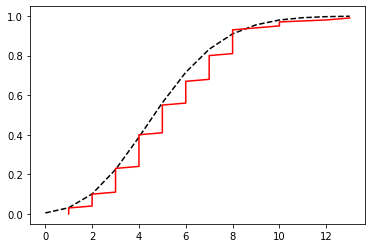

In [3]:
# generate a poisson random number
N = 100
mu = 5

x = poisson.rvs(mu=mu, size=N)
kk, tcdf = poisson_prob(max(x), mu=np.mean(x), dist ='cdf')
plt.plot(kk, tcdf, 'k--');
xx, cdf = ecdf(x)
plt.plot(xx, cdf, 'r-');

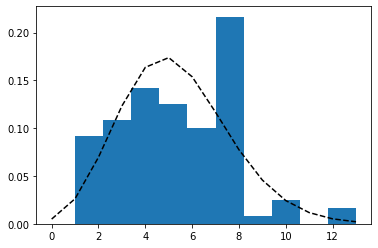

In [4]:
kk, tpdf = poisson_prob(max(x), mu=np.mean(x), dist ='pdf')
plt.plot(kk, tpdf, 'k--');
plt.hist(x, density=True);

In [22]:
import statsmodels.api as sm
X = np.ones_like(x)
res = sm.NegativeBinomial(x,X).fit(start_params=[1,1])
print(res.summary())

Optimization terminated successfully.
         Current function value: 2.265863
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                  100
Model:               NegativeBinomial   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:              -6.386e-09
Time:                        16:28:27   Log-Likelihood:                -226.59
converged:                       True   LL-Null:                       -226.59
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6696      0.045     3